# Project: Hospital Appointments Analysis!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected the dataset named "noshowappointments",this is the dataset of hospital appointments.
The table contains following columns:
1)‘ScheduledDay’ tells us on what day the patient set up their appointment. 
>
2)‘Neighborhood’ indicates the location of the hospital.
>
3)‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>
4)Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
>
**I am going to look over following questions in this inestigation:
   1)How Many patients book the appointment but did not show to hospital? 
   2)Which locality has more number patient not showing to hospital?
   3)How many people recieve the sms and then also do not show to hospital?
   4)At What age people stop showing up to hospital?
**Below I have imported pandas and numpy which I am going to use in my project.**

In [1]:
import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

### General Properties
>
Below I have loaded the data in the variable named "No_Appointment".

In [105]:
#Read the data from csv file in the variable 'No_Appointment' and call the head function to see 5 rows.
No_Appointment=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
No_Appointment

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Data Cleaning:
1)Firstly I want to change the date format of ScheduledDay and AppointmentDay.

2)Then I converted the PatientId to integer using the function to_int.

In [3]:
#This function converts the 'PatientId' and converts it to 'int'.
def to_int(ID):
    return int(ID)

In [4]:
def convert_int(ID):
    if(str(ID)==''):
        return 0
    else:
        return int(ID)

In [108]:
#This calls the to_int function to convert the 'PatientId' to int.
No_Appointment['PatientId']=No_Appointment['PatientId'].apply(convert_int)
No_Appointment['Age']=No_Appointment['Age'].apply(convert_int)
No_Appointment=No_Appointment[No_Appointment.Age > 0]
No_Appointment=No_Appointment[No_Appointment.PatientId > 0]
No_Appointment=No_Appointment[No_Appointment.Neighbourhood!='']
No_Appointment.first

<bound method NDFrame.first of               PatientId  AppointmentID Gender          ScheduledDay  \
0        29872499824296        5642903      F  2016-04-29T18:38:08Z   
1       558997776694438        5642503      M  2016-04-29T16:08:27Z   
2         4262962299951        5642549      F  2016-04-29T16:19:04Z   
3          867951213174        5642828      F  2016-04-29T17:29:31Z   
4         8841186448183        5642494      F  2016-04-29T16:07:23Z   
5        95985133231274        5626772      F  2016-04-27T08:36:51Z   
6       733688164476661        5630279      F  2016-04-27T15:05:12Z   
7         3449833394123        5630575      F  2016-04-27T15:39:58Z   
8        56394729949972        5638447      F  2016-04-29T08:02:16Z   
9        78124564369297        5629123      F  2016-04-27T12:48:25Z   
10      734536231958495        5630213      F  2016-04-27T14:58:11Z   
11        7542951368435        5620163      M  2016-04-26T08:44:12Z   
12      566654781423437        5634718      F 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)
1)How Many patients book the appointment but did not show to hospital?
>
2)Which locality has more number patient not showing to hospital?

In [44]:
#This method is used to plot a bar graph of the above analysis.
import matplotlib.pyplot as plt
def plot1(alis):
    objects = ('Not Showing', 'sms_received', 'female','male')
    y_pos = np.arange(len(objects))
    performance = alis
 
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number of Patients')
    plt.title('Category of analysis not showing to hospital')
    plt.show()

Total Patients in data= 106987
1)How Many patients book the appointment but did not show to hospital?
Number of people booking an appointment and not showing to hospital: 21680
Number of people showing to hospital: 85307
2)Which locality has more number patient not showing to hospital?
The Neighbourhood with maximum people not showing to hospital is JARDIM CAMBURI with the value 1432
3)How many people recieve the sms and then also do not show to hospital?
Number of patient recieving the sms but not showing to hospital: 12112
4)How many females are not showing to hospital
Number of females not showing to hospital are: 14275
5)How many males are not showing to hospital
Number of males not showing to hospital are: 7405


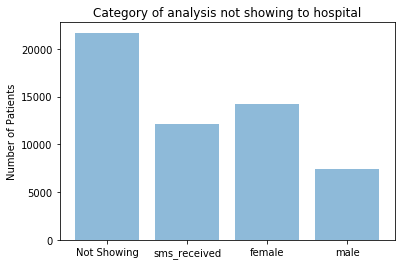

In [45]:
not_shown=0
shown=0
sms_received=0
female=0
a=[]
male=0
table=No_Appointment.groupby('No-show')
Not_showing=table.get_group('Yes')
table=table.size()
not_shown=table[1]
shown=table[0]
total=shown+not_shown
#print(Not_showing['PatientId'])
sms_recived=Not_showing.groupby('SMS_received').size()
sms_received=sms_recived[0]
gender=Not_showing.groupby('Gender').size()
female=gender[0]
male=gender[1]
locality=Not_showing.groupby('Neighbourhood').size()
print("Total Patients in data= "+str(total))
print("1)How Many patients book the appointment but did not show to hospital?")
print("Number of people booking an appointment and not showing to hospital: "+str(not_shown))
a.append(not_shown)
perc=(not_shown/(shown+not_shown))*100
print("Number of people showing to hospital: "+str(shown))
print("2)Which locality has more number patient not showing to hospital?")
print("The Neighbourhood with maximum people not showing to hospital is "+str(locality.idxmax())+" with the value "+str(locality.max()))
print("3)How many people recieve the sms and then also do not show to hospital?")
print("Number of patient recieving the sms but not showing to hospital: "+str(sms_received))
a.append(sms_received)
print("4)How many females are not showing to hospital")
print("Number of females not showing to hospital are: "+str(female))
a.append(female)
print("5)How many males are not showing to hospital")
print("Number of males not showing to hospital are: "+str(male))
a.append(male)
plot1(a)

### Research Question 2  (Replace this header name!)
1)At what age_group people usually stop showing to hospital?

As there is age starting from 1 to 105,I decided to divide the ages in groups,so I made 4 age groups:
young=1 to 25
middle=26 to 50
adult=50 to 75
elder=75 and above.

Total people in age_group 1-25 : 7827
Total people in age_group 25-50 : 7835
Total people in age_group 51-75: 5067
Total people in age_group 75 and above : 951


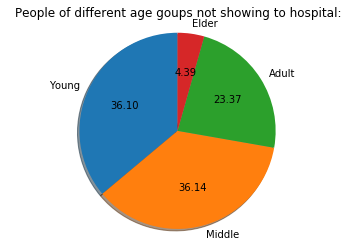

In [93]:
#This cell finds the total people in single age group not showing to hospital
young_not_showing=((No_Appointment[No_Appointment['No-show']=='Yes']['Age'])<25).agg(np.sum)
middle_all=((No_Appointment[No_Appointment['No-show']=='Yes']['Age'])<50).agg(np.sum)
middle_not_showing=middle_all-young_not_showing
adult_all=((No_Appointment[No_Appointment['No-show']=='Yes']['Age'])<75).agg(np.sum)
adult_not_showing=adult_all-middle_all
elder_all=((No_Appointment[No_Appointment['No-show']=='Yes']['Age'])<120).agg(np.sum)
elder_not_showing=elder_all-adult_all
not_showing=np.array([young_not_showing,middle_not_showing,adult_not_showing,elder_not_showing])
statement="People of different age goups not showing to hospital:"
plot_pie(not_showing,statement)

Total people in age_group 1-25 : 26881
Total people in age_group 25-50 : 28730
Total people in age_group 51-75: 25174
Total people in age_group 75 and above : 4522


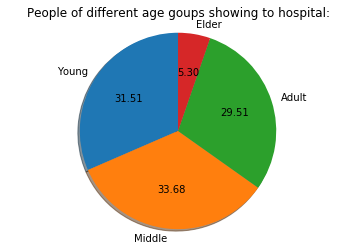

In [90]:
#This cell finds the total people in single age group showing to hospital
young_showing=((No_Appointment[No_Appointment['No-show']=='No']['Age'])<26).agg(np.sum)
middle_show_all=((No_Appointment[No_Appointment['No-show']=='No']['Age'])<51).agg(np.sum)
middle_showing=middle_show_all-young_showing
adult_show_all=((No_Appointment[No_Appointment['No-show']=='No']['Age'])<76).agg(np.sum)
adult_showing=adult_show_all-middle_show_all
elder_show_all=((No_Appointment[No_Appointment['No-show']=='No']['Age'])<120).agg(np.sum)
elder_showing=elder_show_all-adult_show_all
showing=np.array([young_showing,middle_showing,adult_showing,elder_showing])
statement="People of different age goups showing to hospital:"
plot_pie(showing,statement)

In [87]:
#This is used to plot the pie chart.
def plot_pie(groups,stmt):    
    import matplotlib.pyplot as plt
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    print("Total people in age_group 1-25 : "+str(groups[0]))
    print("Total people in age_group 25-50 : "+str(groups[1]))
    print("Total people in age_group 51-75: "+str(groups[2]))
    print("Total people in age_group 75 and above : "+str(groups[3]))
    labels = 'Young', 'Middle', 'Adult', 'Elder'
    explode = (0, 0, 0, 0) 
    fig1, ax1 = plt.subplots()
    ax1.pie(groups,explode=explode, labels=labels, autopct='%.2f',shadow=True,startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(stmt)
    plt.show()

In [119]:
#This cell is used to find out which age group stop showing to hospital.
young_total=not_showing[0]+showing[0]
middle_total=not_showing[1]+showing[1]
adult_total=not_showing[2]+showing[2]
elder_total=not_showing[3]+showing[3]

perc_young=(not_showing[0]/young_total)*100
perc_middle=(not_showing[1]/middle_total)*100
perc_adult=(not_showing[2]/adult_total)*100
perc_elder=(not_showing[3]/elder_total)*100
print("Percentage of young age group not going to hospital: "+str(perc_young))
print("Percentage of middle age group not going to hospital: "+str(perc_middle))
print("Percentage of adult age group not going to hospital: "+str(perc_adult))
print("Percentage of young age group not going to hospital: "+str(perc_elder))

Percentage of young age group not going to hospital: 22.5509968883
Percentage of middle age group not going to hospital: 21.4275946944
Percentage of adult age group not going to hospital: 16.7553983003
Percentage of young age group not going to hospital: 17.3762104878


<a id='conclusions'></a>
## Conclusions
**The limitation is negative and zero age values,and after analysing now I found that this data is not sufficient to answer all questions it is small.**
>>
1)First Phase
**Hence I analysed the data and found how many people not show to hospital,how many of them are females and ploted my finding using a bar graph.
2)Second Phase
I found out that the young age group i.e from 1-25 usually stop showing to hospital as the percentage of young age group not showing to hospital is 22.55% which higher than others.

In [120]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigating a hospital dataset.ipynb'])

0